In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('./TSLA.csv')

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d') # Converts string to datetime
df = df.set_index('Date') # Set the index of dataframe to date column

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-06,284.799988,291.170013,278.880005,280.950012,280.950012,7480800
2018-09-07,260.100006,268.350006,252.250000,263.239990,263.239990,22491900
2018-09-10,273.260010,286.029999,271.000000,285.500000,285.500000,14283500
2018-09-11,279.470001,282.000000,273.549988,279.440002,279.440002,9170000
2018-09-12,281.440002,292.500000,278.649994,290.540009,290.540009,10015400


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-30,229.149994,232.440002,224.210007,225.610001,225.610001,9320600
2019-09-03,224.080002,228.949997,223.160004,225.009995,225.009995,5354100
2019-09-04,226.889999,228.460007,219.210007,220.679993,220.679993,5761000
2019-09-05,222.500000,229.800003,220.850006,229.580002,229.580002,7395300
2019-09-06,227.199997,229.600006,225.169998,228.990005,228.990005,3196301


In [5]:
forecast_out = 60 # Number of how many days to forecast
df['Prediction'] = df['Adj Close'].shift(-forecast_out)

In [6]:
x = np.array(df.drop(['Prediction'], 1))
x = x[:-forecast_out]

In [7]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel score:', lasso_model_score)

LinearModel score: -0.11009058935965577
RidgeModel score: -0.10985173127822344
LassoModel score: -0.10881974333114197


In [11]:
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))

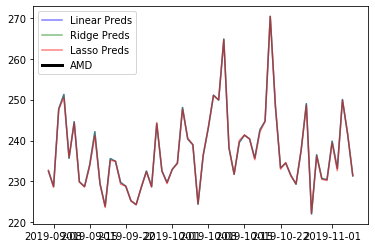

In [13]:
predicted_dates = []
recent_date = df.index.max()
display_at = 2100
alpha = 0.5

for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='AMD', c='black', linewidth=3)
plt.legend()